# Quadratic Least Square Fitting

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable as ptbl

In [2]:
X = np.array([0,0.25,.5,.75,1])
y = np.array([1,1.2840,1.6487,2.157,2.7183])

## Quadratic Least square fitting function

## y = a0 + a1X + a2X^2
 

In [3]:
def QuadraticFitting(x,y):

    x_four_sum = sum(x**4)
    x_three_sum = sum(x**3)
    x_sq_sum = sum(x**2)
    x_sum = sum(x)
    n = len(x)

    y_xsq_sum = sum(y*(x**2))
    yx_sum = sum(x*y)
    y_sum = sum(y)

    A = np.array([
        [n,             x_sum,          x_sq_sum    ],
        [x_sum,         x_sq_sum,       x_three_sum ],
        [x_sq_sum,      x_three_sum,    x_four_sum  ],
        ])
    
    b = np.array([
        [y_sum],
        [yx_sum],
        [y_xsq_sum]
        ])

    print(A,"\n",b)
    invA = np.linalg.inv(A)
    M = np.matmul(invA,b)
    
    return M


## Calling Quadratic least square fitting function on given database

In [4]:
M = QuadraticFitting(X,y)

[[1.3828125 1.5625    1.875    ]
 [1.5625    1.875     1.875    ]
 [1.875     2.5       5.       ]] 
 [[4.4240375]
 [5.4814   ]
 [8.808    ]]


In [5]:
a2 = M[0]
a1 = M[1]
a0 = M[2]

## Visualizing coefficients and constants

In [6]:
print(f"a0 = {a0}\ta1 = {a1}\ta2 = {a2}")

a0 = [0.34126634]	a1 = [5.16735024]	a2 = [-3.1022439]


## Calculating Approximate Values

In [7]:
y_pred = c1*(X**2) + c2*X + c3

NameError: name 'c1' is not defined

## Table of actual values and predicted values

In [25]:
table = ptbl(['X','y','y-predicted'])
for i in range(len(X)):
    table.add_row([X[i],y[i],y_pred[i]])
print(table)

+------+--------+---------------------+
|  X   |   y    |     y-predicted     |
+------+--------+---------------------+
| 0.0  |  1.0   | 0.34126634146341317 |
| 0.25 | 1.284  |  1.439213658536584  |
| 0.5  | 1.6487 |  2.1493804878048777 |
| 0.75 | 2.157  |  2.4717668292682946 |
| 1.0  | 2.7183 |  2.4063726829268335 |
+------+--------+---------------------+


## Visualizing Best Fit Curve

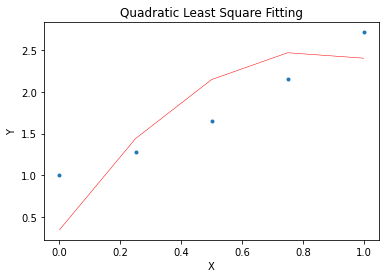

In [26]:
plt.scatter(X,y, marker = '.')
plt.plot(X,y_pred,color = 'red',linewidth = 0.5)
plt.title('Quadratic Least Square Fitting')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Evaluating Error in reconstruction

In [27]:
max_rel_error = max(abs(y-y_pred)/y)
print(max_rel_error)

0.6587336585365868


In [28]:
for i in range(5):
    print(f"y[{i}] = {y[i]}\ty_predict[{i}] = {y_pred[i]}")

y[0] = 1.0	y_predict[0] = 0.34126634146341317
y[1] = 1.284	y_predict[1] = 1.439213658536584
y[2] = 1.6487	y_predict[2] = 2.1493804878048777
y[3] = 2.157	y_predict[3] = 2.4717668292682946
y[4] = 2.7183	y_predict[4] = 2.4063726829268335
